# EDA

In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

## Male Neutral

In [2]:
# LOAD IN FILE
x, sr = librosa.load('D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

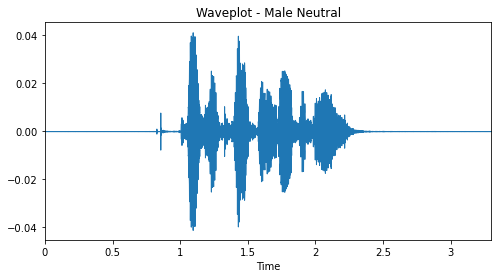

In [3]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

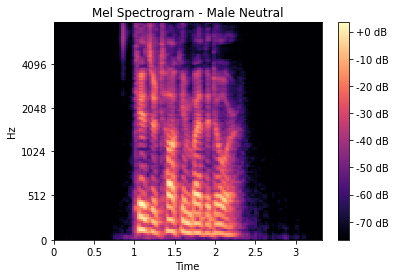

In [4]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

## Female Calm

In [5]:
# LOAD IN FILE
x, sr = librosa.load('D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav')

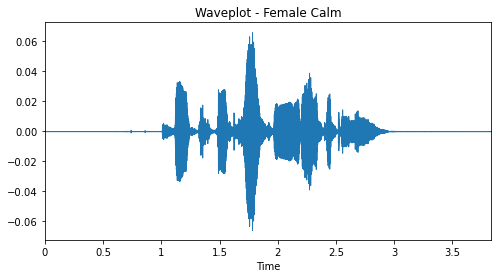

In [6]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')


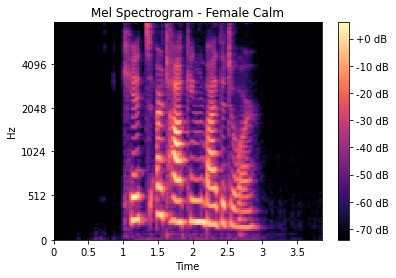

In [7]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');

## Male Happy

In [8]:
# LOAD FILE
x, sr = librosa.load('D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_03/03-01-03-01-01-01-03.wav')

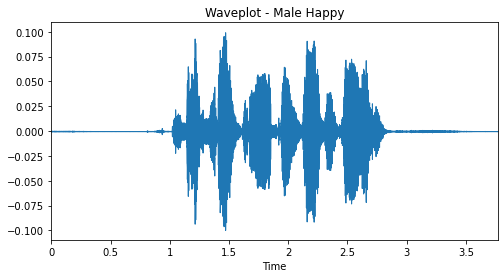

In [9]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')

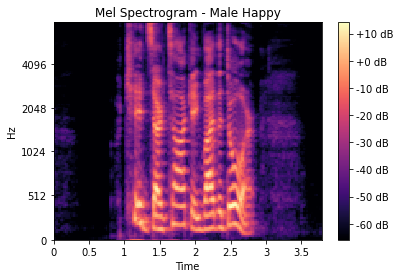

In [10]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB');

## Female Sad

In [11]:
# LOAD FILE
x, sr = librosa.load('D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_04/03-01-04-01-01-01-04.wav')


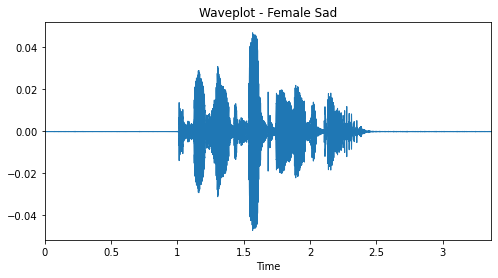

In [12]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')

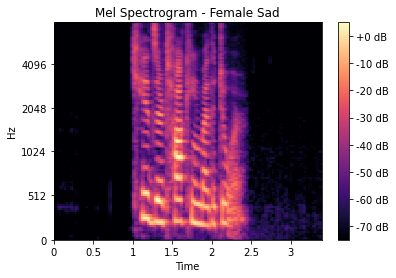

In [13]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Sad');
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB');

## Male Angry

In [14]:
# LOAD FILE
x, sr = librosa.load('D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-01-05.wav')


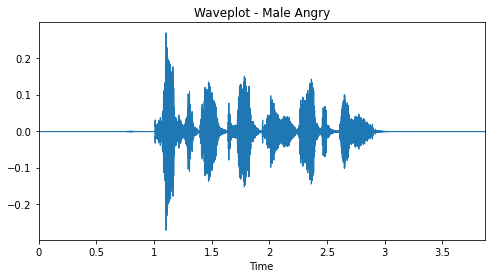

In [15]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')

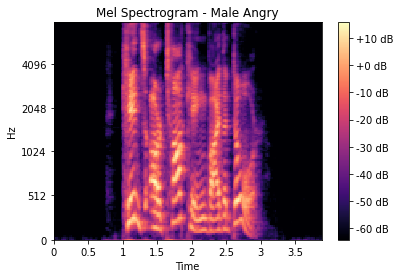

In [16]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');

## Female Fearful

In [17]:
# LOAD FILE
x, sr = librosa.load('D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_06/03-01-06-01-01-01-06.wav')

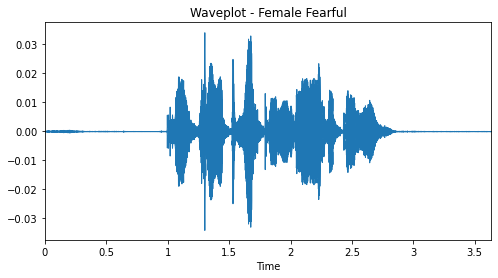

In [18]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')


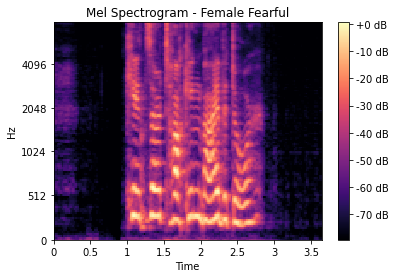

In [19]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB');

## Male Disgust

In [20]:
# LOAD FILE
x, sr = librosa.load('D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_07/03-01-07-01-01-01-07.wav')

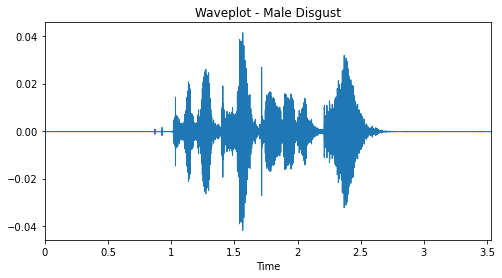

In [21]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')


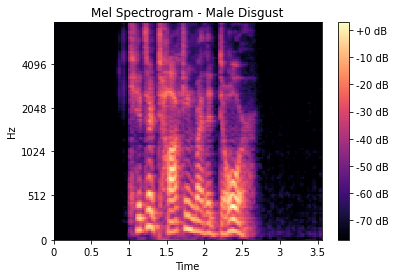

In [22]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB');

## Female Surprised

In [23]:
# LOAD FILE
x, sr = librosa.load('D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_08/03-01-08-01-01-01-08.wav')

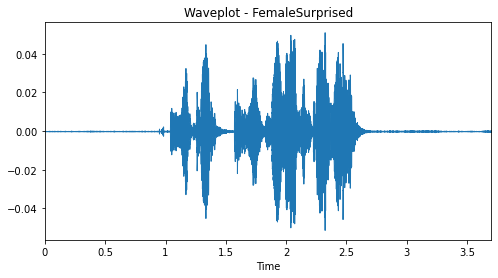

In [24]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')


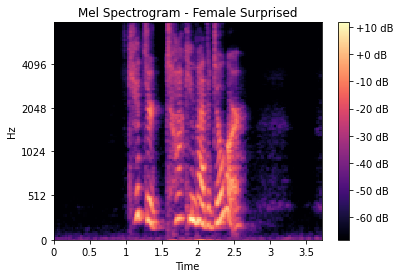

In [25]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB');

# Data Preprocessing

## Labeling Audio Files

In [2]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [3]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [4]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,neutral,1,D:/Projects/Speech_emotion_detector/audio_spee...
1,male,neutral,1,D:/Projects/Speech_emotion_detector/audio_spee...
2,male,neutral,1,D:/Projects/Speech_emotion_detector/audio_spee...
3,male,neutral,1,D:/Projects/Speech_emotion_detector/audio_spee...
4,male,calm,1,D:/Projects/Speech_emotion_detector/audio_spee...
...,...,...,...,...
1435,female,surprise,24,D:/Projects/Speech_emotion_detector/audio_spee...
1436,female,surprise,24,D:/Projects/Speech_emotion_detector/audio_spee...
1437,female,surprise,24,D:/Projects/Speech_emotion_detector/audio_spee...
1438,female,surprise,24,D:/Projects/Speech_emotion_detector/audio_spee...


In [5]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

,gender,emotion,actor,path
815,female,angry,14,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_14/03-01-05-02-02-02-14.wav
913,female,happy,16,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_16/03-01-03-01-01-02-16.wav
765,male,disgust,13,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_13/03-01-07-01-01-02-13.wav
290,male,disgust,5,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_05/03-01-07-02-02-01-05.wav
1105,male,sad,19,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_19/03-01-04-02-01-02-19.wav
445,female,sad,8,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_08/03-01-04-02-01-02-08.wav
120,male,neutral,3,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_03/03-01-01-01-01-01-03.wav
257,male,happy,5,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_05/03-01-03-02-01-02-05.wav
342,female,fear,6,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_06/03-01-06-02-02-01-06.wav
818,female,fear,14,D:/Projects/Speech_emotion_detector/audio_speech_actors_01-24/Actor_14/03-01-06-01-02-01-14.wav


<AxesSubplot:>

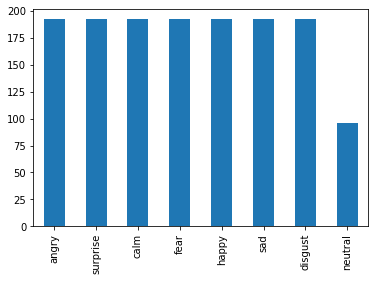

In [6]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [7]:
# EXPORT TO CSV
audio_df.to_csv('D:/Projects/Speech_emotion_detector/audio.csv')

## Feature Extraction

In [8]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.38477, -76.367455, -76.37206, -76.38477, -76.38477, -76.17391, -75.7191, -75.94153, -75.64262, -75.90894, -75.83096, -75.7507, -74.77977, -72.83129, -71.26305, -66.522675, -66.2235, -70.02048, -72.228935, -72.31369, -73.103096, -73.700745, -74.24736, -72.63008, -70.08872, -71.00686, -71.960075, -64.49295, -45.909077, -40.032604, -41.116264, -43.53601, -40.618973, -35.05397, -32.517483, -32.09255, -32.517563, -33.537037, -33.267624, -35.378643, -40.17928, -42.373196, -43.332584, -42.339584, -40.89039, -37.12334, -35.466946, -33.28547, -32.946716, -32.992203, -33.490017, -35.94524, -41.89631, -47.815334, -50.32318, -45.502876, -38.28941, -38.666992, -41.103245, -41.816746, -42.41458, -41.487278, -39.022465, -35.519356, -33.715797, -33.540745, -34.01699, -34.09233, -32.436264, -31.850286, -33.650314, -38.19356, -42.97809, -45.402485, -45.206005, -44.586697, -45.93698, -45.795696, -40.709064, -37.872944, -38.022907, -38.164814, -39.510433, -41.684795, -42.941948, ...]"
1,"[-75.33552, -75.44532, -75.55403, -75.20395, -75.23053, -75.319374, -75.65379, -75.72004, -75.72004, -75.72004, -75.72004, -75.72004, -75.556015, -75.11806, -75.05926, -75.37063, -75.39123, -75.65184, -75.72004, -75.72004, -75.54712, -75.30135, -75.14379, -75.14993, -75.40678, -72.989136, -65.36421, -66.2162, -71.882805, -61.773552, -55.71258, -54.201565, -59.008545, -65.38085, -71.747086, -73.44503, -74.108345, -75.11359, -75.42259, -73.35681, -71.12248, -71.671295, -72.884895, -57.994675, -46.607414, -42.76556, -42.77662, -44.442123, -43.676537, -39.067398, -35.261017, -33.519928, -32.13304, -31.929556, -32.559227, -35.61177, -41.080982, -44.218506, -45.05884, -44.434963, -43.620224, -41.22991, -38.09882, -35.112507, -33.440567, -33.159184, -33.61412, -33.653328, -33.70163, -36.43076, -42.560383, -47.21645, -50.086777, -51.84662, -41.40655, -36.932037, -37.993717, -39.50256, -40.629517, -38.977478, -37.318024, -38.026073, -36.580463, -32.023193, -30.128971, -30.45188, -30.167238, -29.612186, -31.499273, -37.1459, -43.2208, -46.13312, -44.403187, -42.88003, -44.656715, -46.630924, -43.14435, -40.014732, -38.66212, -37.1802, ...]"
2,"[-75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.13959, -75.07223, -75.15071, -75.15071, -75.15071, -75.15071, -75.09937, -75.15071, -75.15071, -75.15071, -75.10905, -75.09412, -75.15071, -74.92822, -74.1517, -74.19842, -74.51549, -75.11954, -75.10399, -75.13165, -75.15071, -75.15071, -75.14988, -75.15071, -75.15071, -75.15071, -75.15071, -75.15071, -75.069016, -74.12102, -73.617714, -74.536026, -74.17392, -73.56244, -72.48515, -73.084854, -49.68085, -39.80159, -36.830807, -35.70478, -34.180237, -31.86353, -30.69315, -30.325382, -30.965012, -30.82406, -30.03375, -28.690538, -28.168774, -28.138542, -29.081398, -30.787271, -33.000286, -37.51421, -41.930313, -44.93863, -44.383247, -41.121105, -40.154667, -39.98905, -39.938183, -41.252922, -40.4535, -37.338863, -35.710594, -36.26966, -36.070953, -36.352516, -36.936497, -38.03057, -39.899944, -40.525482, -41.244236, -41.383785, -40.33425, -38.542667, -39.557934, -40.667435, -37.199425, -32.58196, -32.73895, -33.5526, -37.302288, -43.403584, -39.877724, -35.744804, -34.76521, -34.00362, -33.99902, -34.42435, -35.477673, -38.351665, -41.04027, ...]"
3,"[-75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.243004, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.24528, -75.04568, -74.99168, -75.19989, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -74.34854, -73.92539, -73.56352, -73.27889, -72.94659, -72.36573, -72.77169, -62.66063, -41.765488, -35.625652, -32.697567, -31.232754, -29.58

In [9]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [10]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [11]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,-76.384773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,-75.335518,-75.445320,-75.554031,-75.203949,-75.230530,-75.319374,-75.653793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,-75.150711,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,neutral,1,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,-80.147377,...,-80.147377,-80.147377,-80.121956,-79.998009,-80.119255,-80.147377,-80.130417,-80.014702,-80.147377,-80.147377


# Train Test Split

In [12]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [13]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 259)


In [14]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 259)


# Data Preprocessing

In [15]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [16]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [17]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [25]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 259, 1)

## Base Model

In [20]:
X_train.shape

(1152, 259, 1)

In [21]:
X_test.shape

(288, 259, 1)

In [23]:
X_train = X_train.reshape(1152, 259)
X_test = X_test.reshape(288, 259)

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


0.3402777777777778

## Initial Model

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 250, 64)           704       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 128)            0

In [33]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=80, validation_data=(X_test, y_test),callbacks=[checkpoint])



Epoch 1/80
36/36 [==============================] - 3s 87ms/step - loss: 1.1837 - accuracy: 0.5694 - val_loss: 1.3484 - val_accuracy: 0.5069

Epoch 00001: val_accuracy improved from -inf to 0.50694, saving model to best_initial_model.hdf5
Epoch 2/80
36/36 [==============================] - 3s 94ms/step - loss: 1.1459 - accuracy: 0.5842 - val_loss: 1.3479 - val_accuracy: 0.5035

Epoch 00002: val_accuracy did not improve from 0.50694
Epoch 3/80
36/36 [==============================] - 3s 86ms/step - loss: 1.1300 - accuracy: 0.5981 - val_loss: 1.3506 - val_accuracy: 0.5139

Epoch 00003: val_accuracy improved from 0.50694 to 0.51389, saving model to best_initial_model.hdf5
Epoch 4/80
36/36 [==============================] - 3s 81ms/step - loss: 1.1309 - accuracy: 0.5885 - val_loss: 1.3792 - val_accuracy: 0.5035

Epoch 00004: val_accuracy did not improve from 0.51389
Epoch 5/80
36/36 [==============================] - 3s 84ms/step - loss: 1.1173 - accuracy: 0.6024 - val_loss: 1.3497 - val_a

36/36 [==============================] - 3s 84ms/step - loss: 0.7869 - accuracy: 0.7370 - val_loss: 1.3958 - val_accuracy: 0.5729

Epoch 00040: val_accuracy did not improve from 0.59028
Epoch 41/80
36/36 [==============================] - 3s 81ms/step - loss: 0.7483 - accuracy: 0.7474 - val_loss: 1.3631 - val_accuracy: 0.5556

Epoch 00041: val_accuracy did not improve from 0.59028
Epoch 42/80
36/36 [==============================] - 3s 82ms/step - loss: 0.7398 - accuracy: 0.7595 - val_loss: 1.3749 - val_accuracy: 0.5417

Epoch 00042: val_accuracy did not improve from 0.59028
Epoch 43/80
36/36 [==============================] - 3s 89ms/step - loss: 0.7145 - accuracy: 0.7656 - val_loss: 1.4031 - val_accuracy: 0.5556

Epoch 00043: val_accuracy did not improve from 0.59028
Epoch 44/80
36/36 [==============================] - 3s 87ms/step - loss: 0.7442 - accuracy: 0.7509 - val_loss: 1.3838 - val_accuracy: 0.5556

Epoch 00044: val_accuracy did not improve from 0.59028
Epoch 45/80
36/36 [===

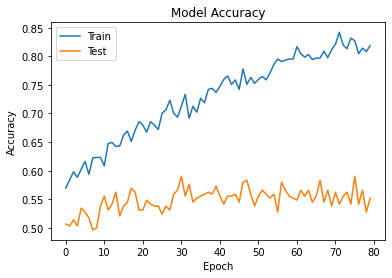

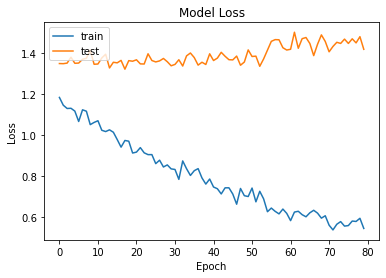

In [34]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

## Post-Model Analysis

In [35]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 28ms/step - loss: 1.4177 - accuracy: 0.5521
Loss of the model is -  1.417708158493042
9/9 [==============================] - 0s 19ms/step - loss: 1.4177 - accuracy: 0.5521
Accuracy of the model is -  55.20833134651184 %


In [36]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,sad,sad
141,surprise,surprise
142,neutral,sad
143,sad,sad
144,fear,fear
145,sad,happy
146,disgust,disgust
147,angry,angry
148,surprise,fear
149,angry,angry


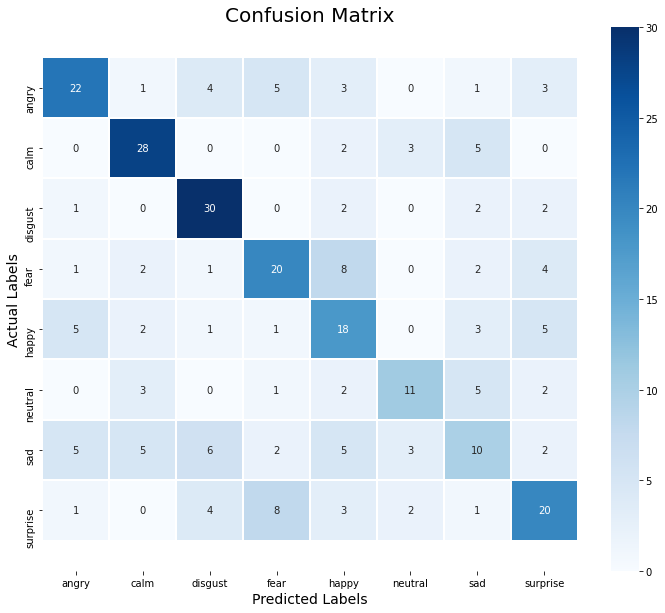

In [37]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [38]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.63      0.56      0.59        39
        calm       0.68      0.74      0.71        38
     disgust       0.65      0.81      0.72        37
        fear       0.54      0.53      0.53        38
       happy       0.42      0.51      0.46        35
     neutral       0.58      0.46      0.51        24
         sad       0.34      0.26      0.30        38
    surprise       0.53      0.51      0.52        39

    accuracy                           0.55       288
   macro avg       0.55      0.55      0.54       288
weighted avg       0.55      0.55      0.55       288



In [39]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['gender','actor']])

X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(1152, 259)
(288, 259)


In [40]:
y_train.shape

(1152, 1)

In [41]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [42]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [43]:
# RESHAPE TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [44]:
y_train

array([['fear'],
       ['angry'],
       ['angry'],
       ...,
       ['calm'],
       ['sad'],
       ['happy']], dtype=object)

In [45]:
from keras.utils import np_utils #, to_categorical

lb = LabelEncoder()

y_train = lb.fit_transform(y_train)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [46]:
# CREATE FUNCTION FOR KERAS CLASSIFIER
opt = keras.optimizers.Adam(lr=0.0001)
def make_classifier(optimizer=opt):
    #BUILD CNN MODEL
    model = Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model


In [47]:
y_trainHot=np.argmax(y_train, axis=1)

In [48]:
# GRID SEARCH PARAMETERS TO FIND BEST VALUES
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [25, 50, 75],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_trainHot)

39/39 [==============================] - 4s 79ms/step - loss: 2.8414 - accuracy: 0.1858


In [49]:
grid_search.best_params_

{'batch_size': 30, 'nb_epoch': 50, 'optimizer': 'SGD'}

In [50]:
grid_search.best_score_

0.2656465273856578